### 패키지 참조

In [38]:
from pandas import DataFrame,read_csv,read_excel,merge,melt,pivot_table
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import sys
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo

### 폰트세팅

In [39]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 불러오기

In [40]:
origin=read_excel('행정동병합최종.xlsx')
origin.head(2)

,Unnamed: 0,시도명,시군구코드,시군구명,행정동코드,행정동코드_수정,읍면동명,생성일자,말소일자,지하철역_수,...,세대당공원면적minmax,수변점수,행정동별버스정류장수,행정동별유통업체수,공공자전거대여소수,인구밀도,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,그린지수minmax
0,0,서울특별시,11110,종로구,1111051500,11110515,청운효자동,20081101,0,0,...,0.352898,0,32,0,3,4552.529183,0.062205,0.166880,0.133927,0.212495
1,1,서울특별시,11110,종로구,1111053000,11110530,사직동,19880423,0,2,...,0.063554,0,27,0,12,7611.382114,0.038557,0.044126,0.184545,0.038269


### 읍면동 및 지수만 뽑아내기

In [41]:
origin1=origin.filter(['읍면동명','그린지수minmax','여가생활지수minmax','사회적약자_지원_인프라_밀집도minmax','접근성지수minmax'])
origin1.head(2)

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.212495,0.062205,0.166880,0.133927
1,사직동,0.038269,0.038557,0.044126,0.184545


In [42]:
origin1.isna().sum()
origin2=origin1.copy()
origin2.head(2)

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.212495,0.062205,0.166880,0.133927
1,사직동,0.038269,0.038557,0.044126,0.184545


### 그린지수, 여가생활지수

In [43]:
origin3=origin2.copy()
origin3_1=origin3.filter(['읍면동명','그린지수minmax','여가생활지수minmax']) # 클러스터링 아이디 붙일 변수
origin3_3=origin3.filter(['그린지수minmax','여가생활지수minmax']) # 계층군집용 변수
origin3_3.head()

,그린지수minmax,여가생활지수minmax
0,0.212495,0.062205
1,0.038269,0.038557
2,0.602143,0.182711
3,0.602143,0.038414
4,0.602861,0.107249


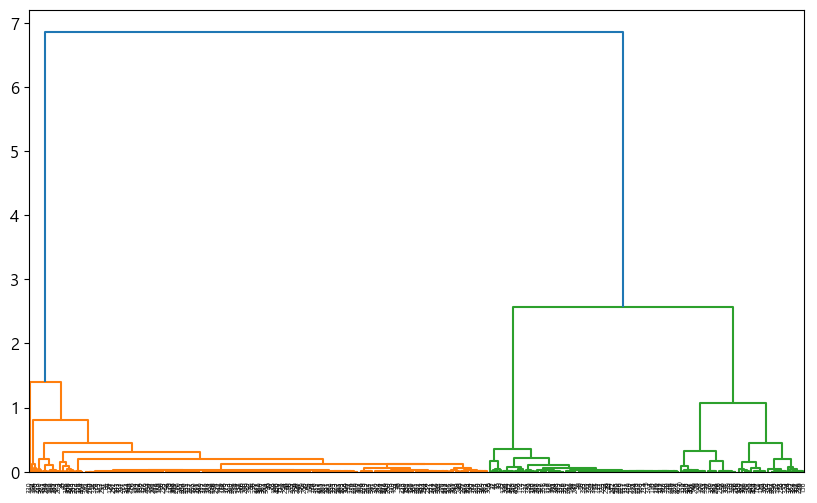

In [44]:
#원래 군집개수 9개로 설정
ac=AgglomerativeClustering(n_clusters=6, metric='euclidean',linkage='ward',compute_distances=True)
clustering=ac.fit(origin3_3)

counts=np.zeros(clustering.children_.shape[0])
n_samples=len(clustering.labels_)

for i,merge in enumerate(clustering.children_):
    current_count=0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count +=1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i]=current_count

linkage_matrix=np.column_stack(
    [clustering.children_,clustering.distances_,counts]
).astype(float)

#plot the corresponding dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.show()
plt.close()

In [45]:
clustering.labels_

array([4, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 4, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 4, 1, 1, 1, 2,
       2, 1, 1, 1, 4, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 4, 1, 4, 1, 0, 1, 1, 1, 4, 4, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       4, 1, 1, 1, 1, 1, 5, 1, 1, 1, 4, 0, 1, 0, 1, 1, 1, 1, 4, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 4, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 4, 1, 5, 2, 5, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 4, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,

In [46]:
origin3_1['labels']=clustering.labels_
origin3_1.head()

,읍면동명,그린지수minmax,여가생활지수minmax,labels
0,청운효자동,0.212495,0.062205,4
1,사직동,0.038269,0.038557,2
2,삼청동,0.602143,0.182711,1
3,부암동,0.602143,0.038414,1
4,평창동,0.602861,0.107249,1


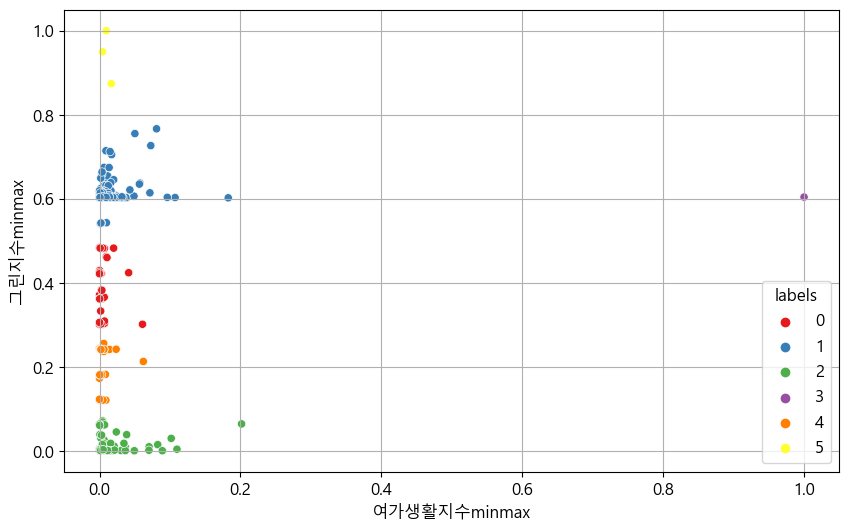

In [47]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=origin3_1,x='여가생활지수minmax',y='그린지수minmax',hue='labels',palette='Set1')
plt.grid()
plt.show()
plt.close()

In [48]:
origin3_1final=DataFrame(origin3_1[origin3_1['labels']==3])
origin3_1final1=DataFrame(origin3_1[origin3_1['labels']==5])

In [50]:
origin333=origin3_1final.merge(origin3_1final1,on='읍면동명',how='outer')
origin333

,읍면동명,그린지수minmax_x,여가생활지수minmax_x,labels_x,그린지수minmax_y,여가생활지수minmax_y,labels_y
0,반포본동,0.603899,1.0,3.0,NaN,NaN,NaN
1,면목제4동,NaN,NaN,NaN,0.949815,0.004376,5.0
2,중계제4동,NaN,NaN,NaN,1.000000,0.009503,5.0
3,상계제1동,NaN,NaN,NaN,0.874020,0.016684,5.0


In [51]:
origin333.to_excel('./교집합결과/여가생활,그린지수voting3.xlsx')

### 그린지수, 사회적약자지수

In [52]:
origin4=origin2.copy()
origin4_1=origin4.filter(['읍면동명','그린지수minmax','사회적약자_지원_인프라_밀집도minmax']) # 클러스터링 아이디 붙일 변수
origin4_3=origin4.filter(['그린지수minmax','사회적약자_지원_인프라_밀집도minmax']) # 계층군집용 변수
origin4_3.head()

,그린지수minmax,사회적약자_지원_인프라_밀집도minmax
0,0.212495,0.166880
1,0.038269,0.044126
2,0.602143,0.118277
3,0.602143,0.144440
4,0.602861,0.658702


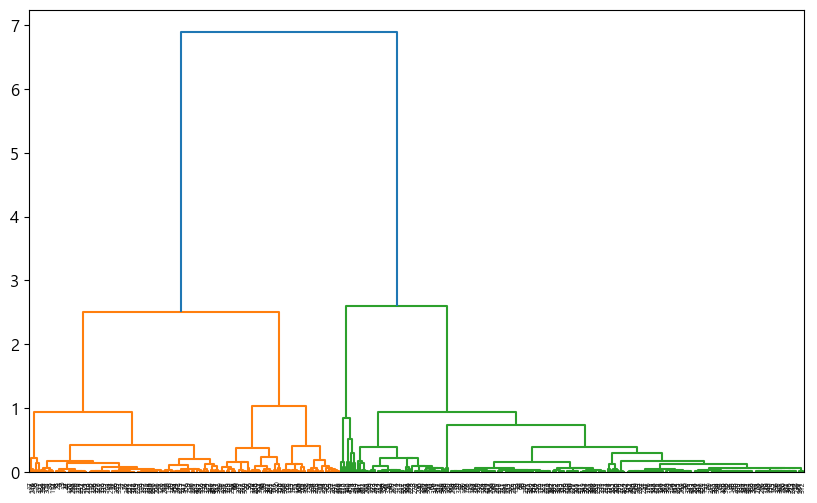

In [53]:
ac2=AgglomerativeClustering(n_clusters=6, metric='euclidean',linkage='ward',compute_distances=True)
clustering2=ac2.fit(origin4_3)

counts=np.zeros(clustering2.children_.shape[0])
n_samples=len(clustering2.labels_)

for i,merge in enumerate(clustering2.children_):
    current_count=0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count +=1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i]=current_count

linkage_matrix=np.column_stack(
    [clustering2.children_,clustering2.distances_,counts]
).astype(float)

#plot the corresponding dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.show()
plt.close()

In [54]:
clustering2.labels_

array([4, 0, 5, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 4, 5, 5, 1, 0,
       0, 5, 5, 1, 4, 1, 1, 1, 1, 3, 1, 3, 0, 1, 5, 5, 1, 1, 1, 1, 5, 3,
       1, 1, 4, 1, 4, 5, 3, 1, 1, 1, 4, 4, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 3, 1, 1, 1, 5, 4, 5, 1, 0,
       0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 1, 0, 5, 3, 3, 1, 1, 0, 4, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1,
       1, 1, 4, 1, 4, 1, 1, 0, 2, 1, 1, 0, 1, 4, 1, 5, 5, 1, 1, 1, 5, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 5, 5, 1, 1, 3, 1, 5, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 4, 1, 1, 5, 5, 1, 1, 1, 1, 5, 2, 1, 1, 4, 0, 1, 0,
       0, 0, 0, 0, 0, 3, 0, 1, 5, 0, 1, 1, 5, 4, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 0, 5, 1, 1, 5, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 5,
       5, 5, 5, 3, 4, 0, 5, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 5, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 5, 0,

In [55]:
origin4_1['labels']=clustering2.labels_
origin4_1.head()

,읍면동명,그린지수minmax,사회적약자_지원_인프라_밀집도minmax,labels
0,청운효자동,0.212495,0.166880,4
1,사직동,0.038269,0.044126,0
2,삼청동,0.602143,0.118277,5
3,부암동,0.602143,0.144440,5
4,평창동,0.602861,0.658702,2


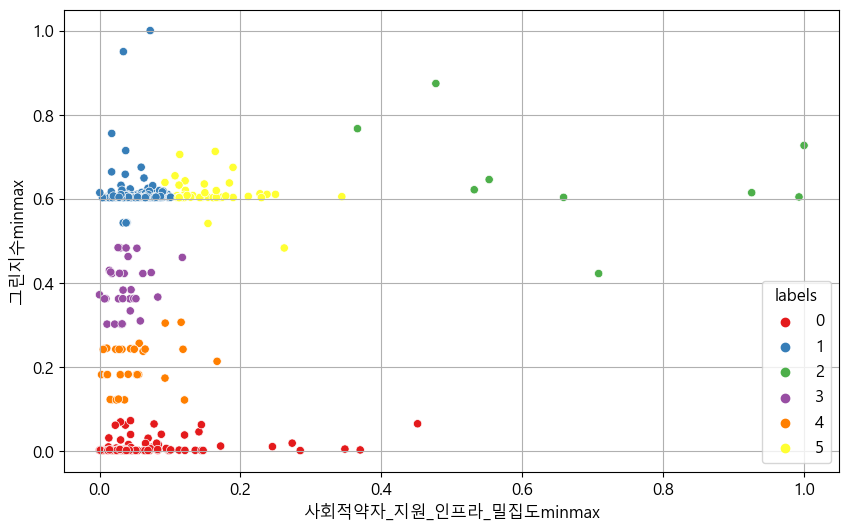

In [56]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=origin4_1,x='사회적약자_지원_인프라_밀집도minmax',y='그린지수minmax',hue='labels',palette='Set1')
plt.grid()
plt.show()
plt.close()

In [57]:
origin4_1[origin4_1['labels']==2]

,읍면동명,그린지수minmax,사회적약자_지원_인프라_밀집도minmax,labels
4,평창동,0.602861,0.658702,2
162,상계제1동,0.874020,0.477411,2
213,상암동,0.726448,1.000000,2
243,가양제1동,0.645265,0.553051,2
275,여의동,0.614035,0.925674,2
330,반포본동,0.603899,0.992845,2
340,양재제1동,0.766479,0.366162,2
359,세곡동,0.621029,0.531887,2
404,둔촌제1동,0.421500,0.708442,2


In [58]:
origin4_1final=DataFrame(origin4_1[origin4_1['labels']==2])
origin4_1final.to_excel('./교집합결과/사회적약자,그린지수voting3.xlsx')

### 그린지수, 접근성지수

In [59]:
origin5=origin2.copy()
origin5_1=origin5.filter(['읍면동명','그린지수minmax','접근성지수minmax']) # 클러스터링 아이디 붙일 변수
origin5_3=origin5.filter(['그린지수minmax','접근성지수minmax']) # 계층군집용 변수
origin5_3.head()

,그린지수minmax,접근성지수minmax
0,0.212495,0.133927
1,0.038269,0.184545
2,0.602143,0.233276
3,0.602143,0.162233
4,0.602861,0.560716


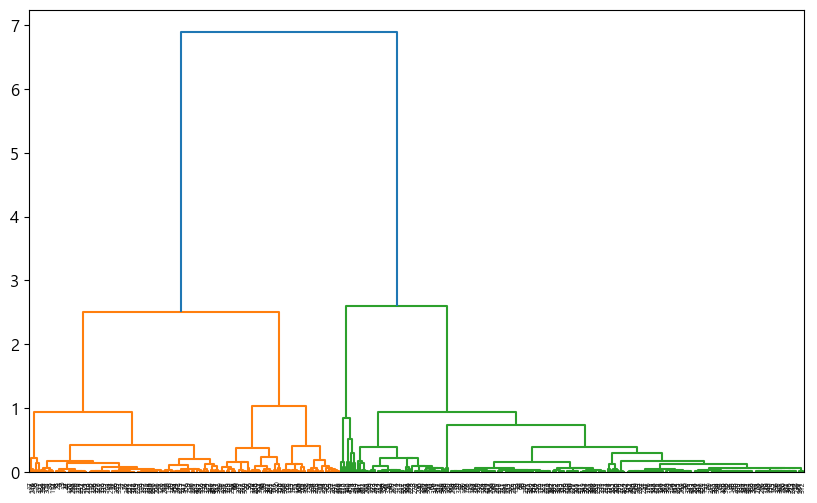

In [60]:
ac3=AgglomerativeClustering(n_clusters=6, metric='euclidean',linkage='ward',compute_distances=True)
clustering3=ac3.fit(origin4_3)

counts=np.zeros(clustering3.children_.shape[0])
n_samples=len(clustering3.labels_)

for i,merge in enumerate(clustering3.children_):
    current_count=0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count +=1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i]=current_count

linkage_matrix=np.column_stack(
    [clustering3.children_,clustering3.distances_,counts]
).astype(float)

#plot the corresponding dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.show()
plt.close()

In [61]:
clustering3.labels_

array([4, 0, 5, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 4, 5, 5, 1, 0,
       0, 5, 5, 1, 4, 1, 1, 1, 1, 3, 1, 3, 0, 1, 5, 5, 1, 1, 1, 1, 5, 3,
       1, 1, 4, 1, 4, 5, 3, 1, 1, 1, 4, 4, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 3, 1, 1, 1, 5, 4, 5, 1, 0,
       0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 1, 0, 5, 3, 3, 1, 1, 0, 4, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1,
       1, 1, 4, 1, 4, 1, 1, 0, 2, 1, 1, 0, 1, 4, 1, 5, 5, 1, 1, 1, 5, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 5, 5, 1, 1, 3, 1, 5, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 4, 1, 1, 5, 5, 1, 1, 1, 1, 5, 2, 1, 1, 4, 0, 1, 0,
       0, 0, 0, 0, 0, 3, 0, 1, 5, 0, 1, 1, 5, 4, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 0, 5, 1, 1, 5, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 5,
       5, 5, 5, 3, 4, 0, 5, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 5, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 5, 0,

In [62]:
origin5_1['labels']=clustering3.labels_
origin5_1.head()

,읍면동명,그린지수minmax,접근성지수minmax,labels
0,청운효자동,0.212495,0.133927,4
1,사직동,0.038269,0.184545,0
2,삼청동,0.602143,0.233276,5
3,부암동,0.602143,0.162233,5
4,평창동,0.602861,0.560716,2


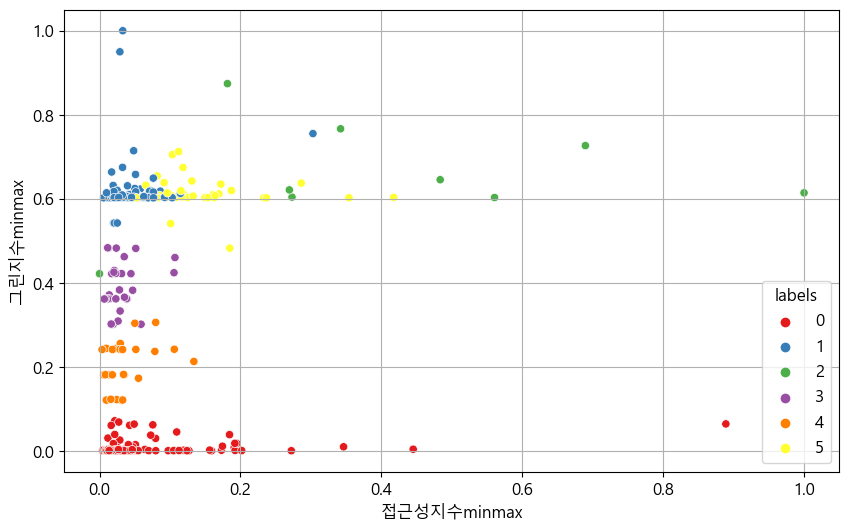

In [63]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=origin5_1,x='접근성지수minmax',y='그린지수minmax',hue='labels',palette='Set1')
plt.grid()
plt.show()
plt.close()

In [65]:
origin5_1[origin5_1['labels']==2]

,읍면동명,그린지수minmax,접근성지수minmax,labels
4,평창동,0.602861,0.560716,2
162,상계제1동,0.874020,0.181578,2
213,상암동,0.726448,0.689607,2
243,가양제1동,0.645265,0.483549,2
275,여의동,0.614035,1.000000,2
330,반포본동,0.603899,0.273210,2
340,양재제1동,0.766479,0.342199,2
359,세곡동,0.621029,0.269476,2
404,둔촌제1동,0.421500,0.000000,2


In [66]:
origin5_1final=DataFrame(origin5_1[origin5_1['labels']==2])
origin5_1final.to_excel('./교집합결과/접근성지수,그린지수voting3.xlsx')

### 여가생활지수, 사회적약자지수

In [67]:
origin6=origin2.copy()
origin6_1=origin6.filter(['읍면동명','여가생활지수minmax','사회적약자_지원_인프라_밀집도minmax']) # 클러스터링 아이디 붙일 변수
origin6_3=origin6.filter(['여가생활지수minmax','사회적약자_지원_인프라_밀집도minmax']) # 계층군집용 변수
origin6_3.head()

,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax
0,0.062205,0.166880
1,0.038557,0.044126
2,0.182711,0.118277
3,0.038414,0.144440
4,0.107249,0.658702


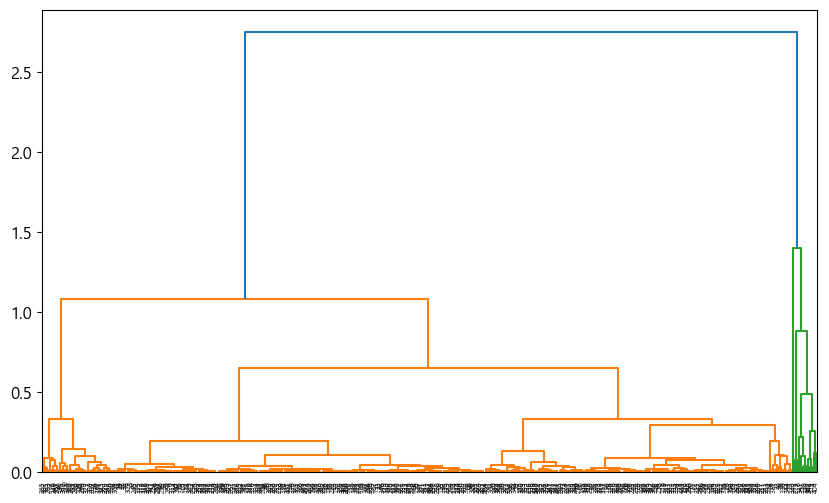

In [68]:
#원래 군집 개수4개였음
ac4=AgglomerativeClustering(n_clusters=6, metric='euclidean',linkage='ward',compute_distances=True)
clustering4=ac4.fit(origin6_3)

counts=np.zeros(clustering4.children_.shape[0])
n_samples=len(clustering4.labels_)

for i,merge in enumerate(clustering4.children_):
    current_count=0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count +=1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i]=current_count

linkage_matrix=np.column_stack(
    [clustering4.children_,clustering4.distances_,counts]
).astype(float)

#plot the corresponding dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.show()
plt.close()

In [69]:
clustering4.labels_

array([3, 1, 1, 3, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 0, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 1, 2, 2,
       2, 3, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 3, 1,
       2, 2, 2, 2, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 3, 1, 3,
       1, 1, 2, 2, 1, 2, 2, 1, 3, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 3, 3, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 3, 3, 1, 2, 2, 2, 1, 4, 1, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 0, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 3,
       3, 3, 3, 2, 2, 2, 3, 1, 2, 2, 1, 4, 2, 1, 2, 1, 1, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 3, 2,

In [70]:
origin6_1['labels']=clustering4.labels_
origin6_1.head()

,읍면동명,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,labels
0,청운효자동,0.062205,0.166880,3
1,사직동,0.038557,0.044126,1
2,삼청동,0.182711,0.118277,1
3,부암동,0.038414,0.144440,3
4,평창동,0.107249,0.658702,0


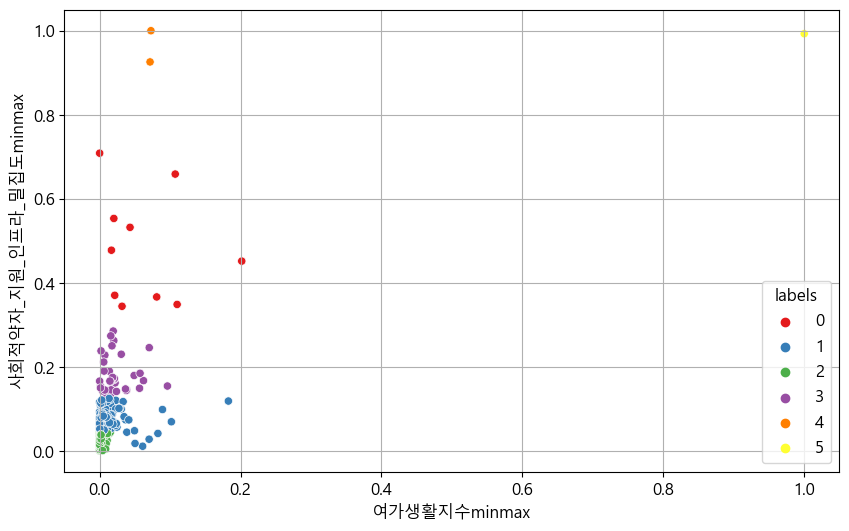

In [71]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=origin6_1,x='여가생활지수minmax',y='사회적약자_지원_인프라_밀집도minmax',hue='labels',palette='Set1')
plt.grid()
plt.show()
plt.close()

In [72]:
origin6_1final=DataFrame(origin6_1[origin6_1['labels']==0])
origin6_1final1=DataFrame(origin6_1[origin6_1['labels']==4])

In [73]:
origin666=origin6_1final.merge(origin6_1final1,on='읍면동명',how='outer')
origin666

,읍면동명,여가생활지수minmax_x,사회적약자_지원_인프라_밀집도minmax_x,labels_x,여가생활지수minmax_y,사회적약자_지원_인프라_밀집도minmax_y,labels_y
0,평창동,0.107249,0.658702,0.0,NaN,NaN,NaN
1,종로1.2.3.4가동,0.201658,0.451458,0.0,NaN,NaN,NaN
2,명동,0.109953,0.348319,0.0,NaN,NaN,NaN
3,상계제1동,0.016684,0.477411,0.0,NaN,NaN,NaN
4,가양제1동,0.020125,0.553051,0.0,NaN,NaN,NaN
5,양재제1동,0.080960,0.366162,0.0,NaN,NaN,NaN
6,신사동,0.031737,0.343924,0.0,NaN,NaN,NaN
7,역삼제1동,0.021396,0.370047,0.0,NaN,NaN,NaN
8,세곡동,0.043102,0.531887,0.0,NaN,NaN,NaN
9,둔촌제1동,0.000000,0.708442,0.0,NaN,NaN,NaN


In [74]:
origin666.to_excel('./교집합결과/여가생활,사회적약자voting3.xlsx')

### 여가생활지수, 접근성지수

In [75]:
origin7=origin2.copy()
origin7_1=origin7.filter(['읍면동명','여가생활지수minmax','접근성지수minmax']) # 클러스터링 아이디 붙일 변수
origin7_3=origin7.filter(['여가생활지수minmax','접근성지수minmax']) # 계층군집용 변수
origin7_3.head()

,여가생활지수minmax,접근성지수minmax
0,0.062205,0.133927
1,0.038557,0.184545
2,0.182711,0.233276
3,0.038414,0.162233
4,0.107249,0.560716


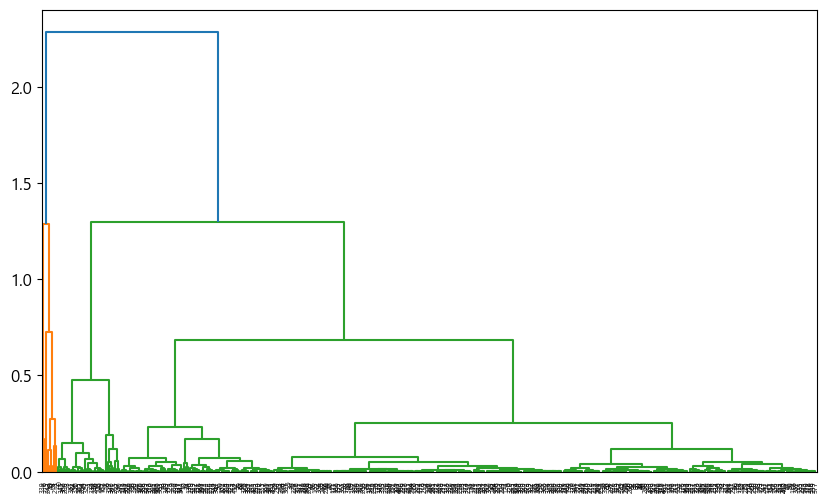

In [76]:
# 원래 군집설정 4개였음
ac5=AgglomerativeClustering(n_clusters=6, metric='euclidean',linkage='ward',compute_distances=True)
clustering5=ac5.fit(origin7_3)

counts=np.zeros(clustering5.children_.shape[0])
n_samples=len(clustering5.labels_)

for i,merge in enumerate(clustering5.children_):
    current_count=0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count +=1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i]=current_count

linkage_matrix=np.column_stack(
    [clustering5.children_,clustering5.distances_,counts]
).astype(float)

#plot the corresponding dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.show()
plt.close()

In [77]:
clustering5.labels_

array([0, 0, 0, 0, 1, 2, 2, 5, 4, 5, 5, 5, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0,
       0, 0, 5, 2, 2, 2, 2, 2, 2, 2, 2, 5, 0, 2, 2, 2, 2, 2, 1, 5, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 5, 2, 0, 2,
       2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 0, 2, 5, 2, 0,
       2, 2, 2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5,
       2, 5, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 0, 5, 2, 2, 2, 2, 5, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 2, 2, 5, 0, 5, 2, 2, 2, 2, 5, 1, 5, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 5, 5, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 5, 2, 2, 2, 5, 2, 2, 2, 5, 4, 2, 5, 2, 5, 2, 5, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 5, 2,

In [78]:
origin7_1['labels']=clustering5.labels_
origin7_1.head()

,읍면동명,여가생활지수minmax,접근성지수minmax,labels
0,청운효자동,0.062205,0.133927,0
1,사직동,0.038557,0.184545,0
2,삼청동,0.182711,0.233276,0
3,부암동,0.038414,0.162233,0
4,평창동,0.107249,0.560716,1


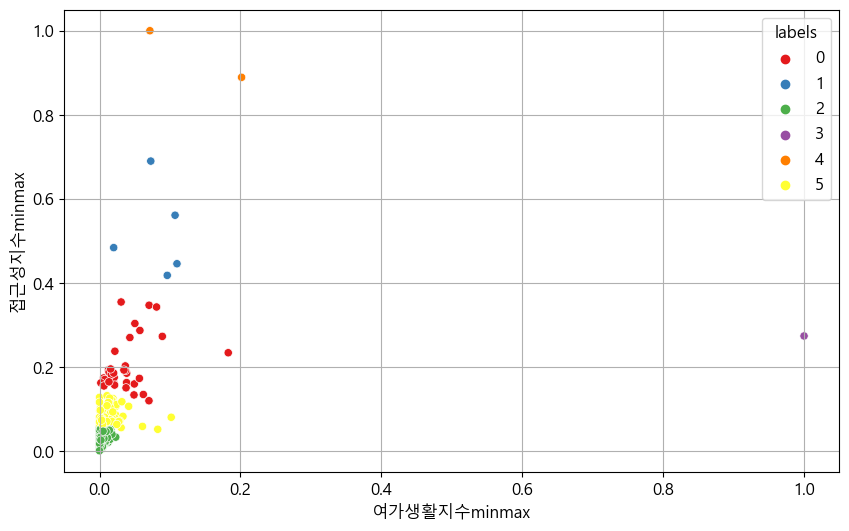

In [79]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=origin7_1,x='여가생활지수minmax',y='접근성지수minmax',hue='labels',palette='Set1')
plt.grid()
plt.show()
plt.close()

In [80]:
origin7_1final=DataFrame(origin7_1[origin7_1['labels']==4])
origin7_1final1=DataFrame(origin7_1[origin7_1['labels']==3])

In [81]:
origin777=origin7_1final.merge(origin7_1final1,on='읍면동명',how='outer')
origin777

,읍면동명,여가생활지수minmax_x,접근성지수minmax_x,labels_x,여가생활지수minmax_y,접근성지수minmax_y,labels_y
0,종로1.2.3.4가동,0.201658,0.889024,4.0,NaN,NaN,NaN
1,여의동,0.071520,1.000000,4.0,NaN,NaN,NaN
2,반포본동,NaN,NaN,NaN,1.0,0.27321,3.0


In [82]:
origin777.to_excel('./교집합결과/여가생활,접근성지수voting3.xlsx')

### 사회적약자지수, 접근성지수

In [83]:
origin8=origin2.copy()
origin8_1=origin8.filter(['읍면동명','사회적약자_지원_인프라_밀집도minmax','접근성지수minmax']) # 클러스터링 아이디 붙일 변수
origin8_3=origin8.filter(['사회적약자_지원_인프라_밀집도minmax','접근성지수minmax']) # 계층군집용 변수
origin8_3.head()

,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,0.166880,0.133927
1,0.044126,0.184545
2,0.118277,0.233276
3,0.144440,0.162233
4,0.658702,0.560716


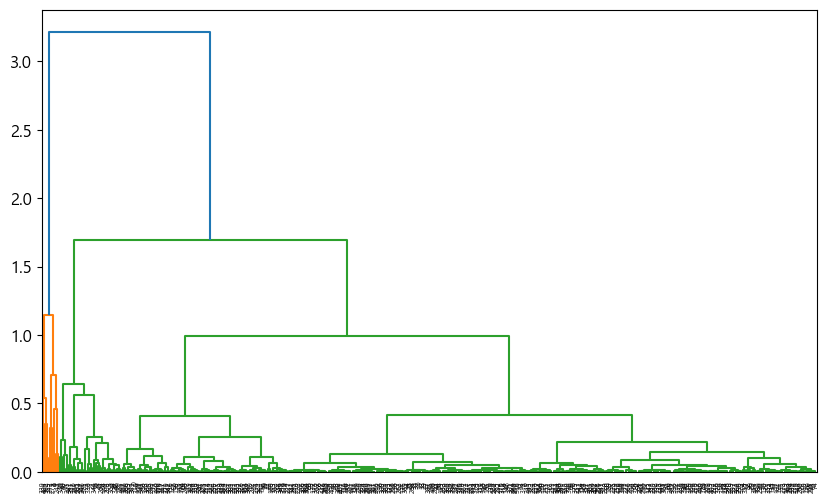

In [84]:
#원래 군집개수 3개
ac6=AgglomerativeClustering(n_clusters=6, metric='euclidean',linkage='ward',compute_distances=True)
clustering6=ac6.fit(origin8_3)

counts=np.zeros(clustering6.children_.shape[0])
n_samples=len(clustering6.labels_)

for i,merge in enumerate(clustering6.children_):
    current_count=0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count +=1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i]=current_count

linkage_matrix=np.column_stack(
    [clustering6.children_,clustering6.distances_,counts]
).astype(float)

#plot the corresponding dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.show()
plt.close()

In [85]:
clustering6.labels_

array([4, 0, 0, 0, 2, 3, 3, 3, 2, 4, 4, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 3, 3, 3, 3, 3, 0, 4, 3, 3,
       3, 0, 0, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 0, 3,
       3, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 0, 3, 4, 3, 0,
       3, 3, 3, 3, 4, 3, 3, 3, 0, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       3, 4, 4, 3, 4, 3, 3, 3, 1, 3, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 0, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 4, 0, 4, 3, 3, 3, 3, 4, 5, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 0, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 4, 3, 3, 3, 4, 3, 3, 3, 4, 5, 3, 4, 3, 4, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3,

In [86]:
origin8_1['labels']=clustering6.labels_
origin8_1.head()

,읍면동명,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,labels
0,청운효자동,0.166880,0.133927,4
1,사직동,0.044126,0.184545,0
2,삼청동,0.118277,0.233276,0
3,부암동,0.144440,0.162233,0
4,평창동,0.658702,0.560716,2


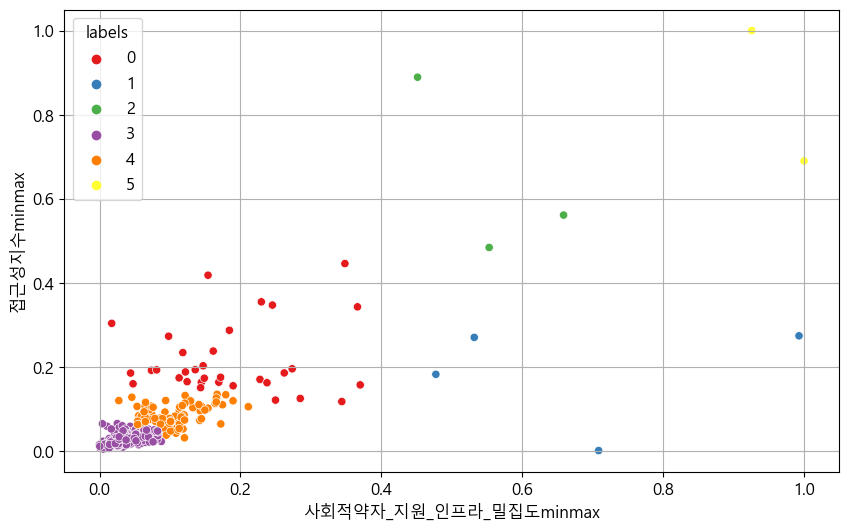

In [87]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=origin8_1,x='사회적약자_지원_인프라_밀집도minmax',y='접근성지수minmax',hue='labels',palette='Set1')
plt.grid()
plt.show()
plt.close()

In [88]:
origin8_1final=DataFrame(origin8_1[origin8_1['labels']==5])
origin8_1final1=DataFrame(origin8_1[origin8_1['labels']==2])

In [89]:
origin888=origin8_1final.merge(origin8_1final1,on='읍면동명',how='outer')
origin888

,읍면동명,사회적약자_지원_인프라_밀집도minmax_x,접근성지수minmax_x,labels_x,사회적약자_지원_인프라_밀집도minmax_y,접근성지수minmax_y,labels_y
0,상암동,1.000000,0.689607,5.0,NaN,NaN,NaN
1,여의동,0.925674,1.000000,5.0,NaN,NaN,NaN
2,평창동,NaN,NaN,NaN,0.658702,0.560716,2.0
3,종로1.2.3.4가동,NaN,NaN,NaN,0.451458,0.889024,2.0
4,가양제1동,NaN,NaN,NaN,0.553051,0.483549,2.0


In [51]:
origin888.to_excel('./교집합결과/사회적약자,접근성지수voting3.xlsx')